## GradeForecast – Machine Learning for Student Marks Prediction

In [1]:
# step1️.Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# step 2: Load Dataset

df = pd.read_csv("Student_Marks.csv")  # change path if needed
df.columns = df.columns.str.strip()    # remove extra spaces from column names

In [5]:
# View first few rows

print(df.head())

   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299


In [7]:
# step 3:Explore the Data

print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


In [9]:
print("\nSummary Stats:")
print(df.describe())


Summary Stats:
       number_courses  time_study       Marks
count      100.000000  100.000000  100.000000
mean         5.290000    4.077140   24.417690
std          1.799523    2.372914   14.326199
min          3.000000    0.096000    5.609000
25%          4.000000    2.058500   12.633000
50%          5.000000    4.022000   20.059500
75%          7.000000    6.179250   36.676250
max          8.000000    7.957000   55.299000


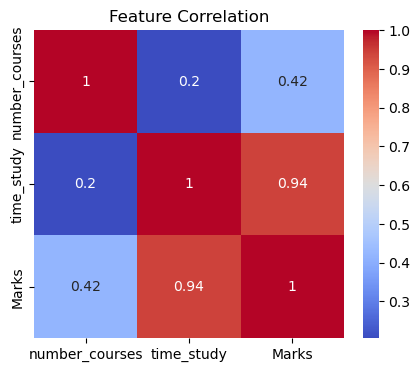

In [11]:
# Correlation heatmap

plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [13]:
# step 4: Define Features (X) and Target (y)

X = df[['time_study', 'number_courses']]  # independent variables
y = df['Marks']                            # dependent variable

In [15]:
# step 5: Split Data into Train & Test Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# step 6 :Train the Multiple Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Print model parameters

print("\nModel Coefficients:", model.coef_)   # m1 and m2
print("Model Intercept:", model.intercept_)  # b



Model Coefficients: [5.16987176 1.87154988]
Model Intercept: -6.613046733912935


In [21]:
# Model equation:
# Marks = (coef_[0] * time_study) + (coef_[1] * number_courses) + intercept


In [23]:
# step 7: Make Predictions

y_pred = model.predict(X_test)

In [25]:
# step 8 : Evaluate Model Performance

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [27]:
print("\nR² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9459936100591211
Mean Squared Error: 14.200726136374609


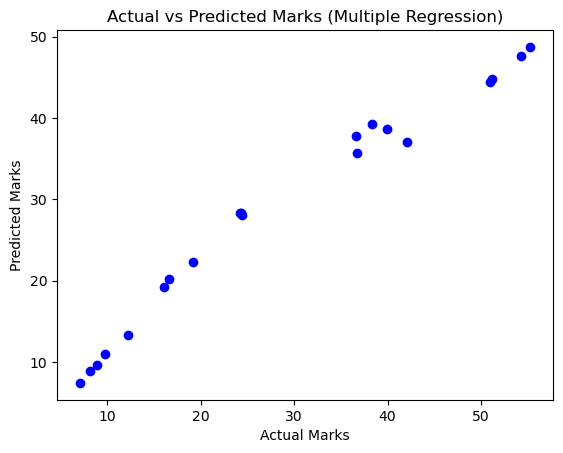

In [29]:
# step 9: Visualize Predicted vs Actual Marks

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks (Multiple Regression)")
plt.show()